### Montecarlo Valuation of European Call Option

SDE:

$dS_t=rS_t.dt+\sigma S_tdZ_1$

Euler discretization of SDE 

$S_t=S_{t-\Delta t}\exp((r-\frac{1}{2}\sigma^2)\Delta t + \sigma\sqrt{\Delta t}z_t)$

In [1]:
#
# Monte Carlo valuation of European call options with NumPy
# mcs_vector_numpy.py
#
import math
import numpy as np
from time import time
np.random.seed(12)
t0 = time()

# Parameters

S0 = 100.; K = 105.; T = 1.0; r = 0.05; sigma = 0.2
M = 50; dt = T / M; I = 250000

# Simulating I paths with M time steps

S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    z = np.random.standard_normal(I)  # pseudorandom numbers
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt
                                  + sigma * math.sqrt(dt) * z)
      # vectorized operation per time step over all paths
# Calculating the Monte Carlo estimator
C0 = math.exp(-r * T) * np.sum(np.maximum(S[-1] - K, 0)) / I
# Results output
tnp1 = time() - t0

print ("European Option Value %7.3f" % C0)
print ("Duration in Seconds   %7.3f" % tnp1)

#Source Python For Finance Yvis Hilpisch

European Option Value   8.011
Duration in Seconds     2.241


Text(0, 0.5, 'index level')

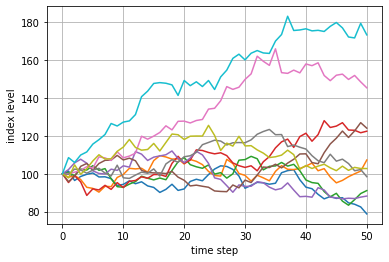

In [2]:
import matplotlib.pyplot as plt
plt.plot(S[:, :10])
plt.grid(True)
plt.xlabel('time step')
plt.ylabel('index level')

Text(0, 0.5, 'frequency')

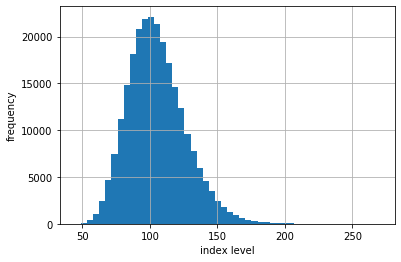

In [3]:
plt.hist(S[-1], bins=50)
plt.grid(True)
plt.xlabel('index level')
plt.ylabel('frequency')

(0, 50000)

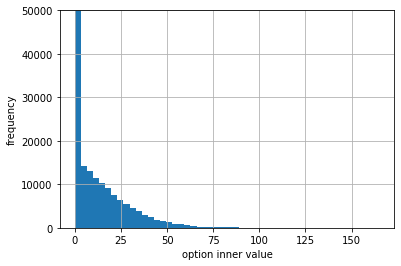

In [4]:
plt.hist(np.maximum(S[-1] - K, 0), bins=50)
plt.grid(True)
plt.xlabel('option inner value')
plt.ylabel('frequency')
plt.ylim(0, 50000)